In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import preprocessing
from sklearn import svm, metrics, neural_network, linear_model
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv('train.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


## VariableDefinition
survival: Survival 0 = No, 1 = Yes 

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: 'male', 'female'

sibsp: # of siblings / spouses aboard the Titanic 

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare 

cabin: Cabin number 

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [32]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data visualization

In [5]:
survive_group = data.groupby(('Survived'))[['Survived']].count()
survive_group.rename(columns={'Survived': 'count'}, inplace=True)

gb_group = data.groupby(('Sex'))[['Sex']].count()
gb_group.rename(columns={'Sex': 'count'}, inplace=True)

class_group = data.groupby(('Pclass'))[['Pclass']].count()
class_group.columns = ['count']

embark_group = data.groupby(('Embarked'))[['Embarked']].count()
embark_group.columns = ['count']

ss_group = data.groupby(('Survived', 'Sex'))[['Sex']].count()
cs_group = data.groupby(('Survived', 'Pclass'))[['Pclass']].count()
es_group = data.groupby(('Survived', 'Embarked'))[['Embarked']].count()

## Categorical distributions

In [6]:
print(survive_group)
print(gb_group)
print(class_group)
print(embark_group)

          count
Survived       
0           549
1           342
        count
Sex          
female    314
male      577
        count
Pclass       
1         216
2         184
3         491
          count
Embarked       
C           168
Q            77
S           644


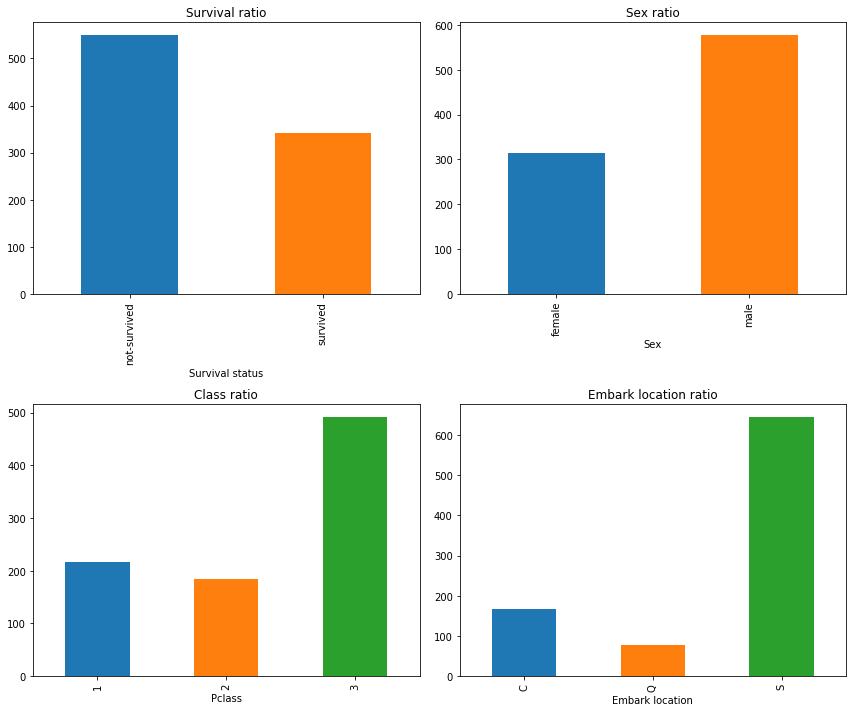

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(12)

surv_ax = survive_group.unstack().plot.bar(ax=axes[0,0], title='Survival ratio')
surv_ax.set_xlabel('Survival status')
surv_ax.set_xticklabels(['not-survived', 'survived'])

sex_ax = gb_group.unstack().plot.bar(ax=axes[0,1], title='Sex ratio')
sex_ax.set_xlabel('Sex')
sex_ax.set_xticklabels(['female', 'male'])

class_ax = class_group.unstack().plot.bar(ax=axes[1,0], title='Class ratio')
class_ax.set_xlabel('Pclass')
class_ax.set_xticklabels(['1','2','3'])

embark_ax = embark_group.unstack().plot.bar(ax=axes[1,1], title='Embark location ratio')
embark_ax.set_xlabel('Embark location')
embark_ax.set_xticklabels(['C','Q','S'])

plt.tight_layout()
plt.show()

## Numerical distributions

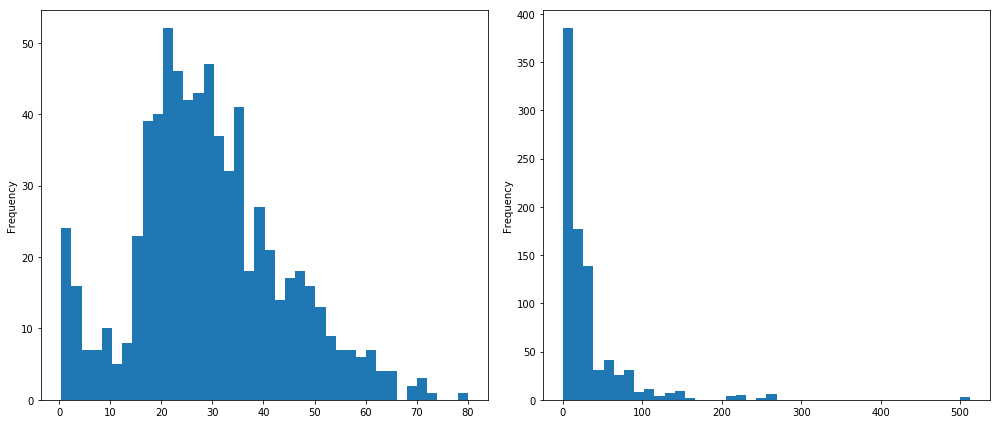

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data['Age'].plot.hist(ax=axes[0], bins=40)
data['Fare'].plot.hist(ax=axes[1], bins=40)
plt.tight_layout()
plt.show()

## Variable relationships

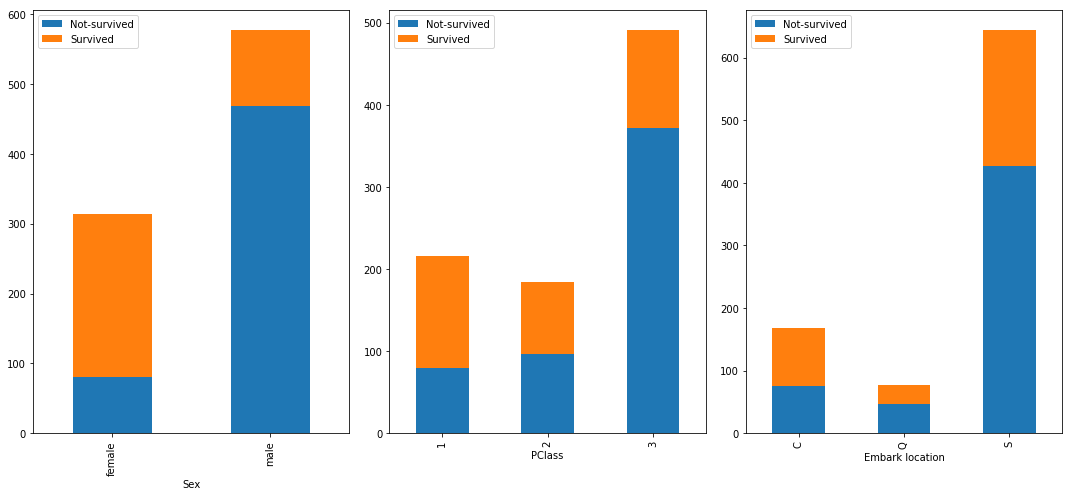

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(7)
fig.set_figwidth(15)

ss_ax = ss_group.unstack('Survived').plot.bar(ax=axes[0], stacked=True)
ss_ax.set_xlabel('Sex')
ss_ax.legend(['Not-survived', 'Survived'])

cs_ax = cs_group.unstack('Survived').plot.bar(ax=axes[1], stacked=True)
cs_ax.set_xlabel('PClass')
cs_ax.legend(['Not-survived', 'Survived'])

es_ax = es_group.unstack('Survived').plot.bar(ax=axes[2], stacked=True)
es_ax.set_xlabel('Embark location')
es_ax.legend(['Not-survived', 'Survived'])

plt.tight_layout()
plt.show()

In [10]:
result = stats.chi2_contingency(ss_group.unstack('Survived'))
print('Sex-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

result = stats.chi2_contingency(cs_group.unstack('Survived'))
print('Pclass-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

result = stats.chi2_contingency(es_group.unstack('Survived'))
print('Embarked-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

Sex-Survived Chi2
chi2: 260.71702016732104, p-value: 1.1973570627755645e-58
Pclass-Survived Chi2
chi2: 102.88898875696056, p-value: 4.549251711298793e-23
Embarked-Survived Chi2
chi2: 26.48914983923762, p-value: 1.769922284120912e-06


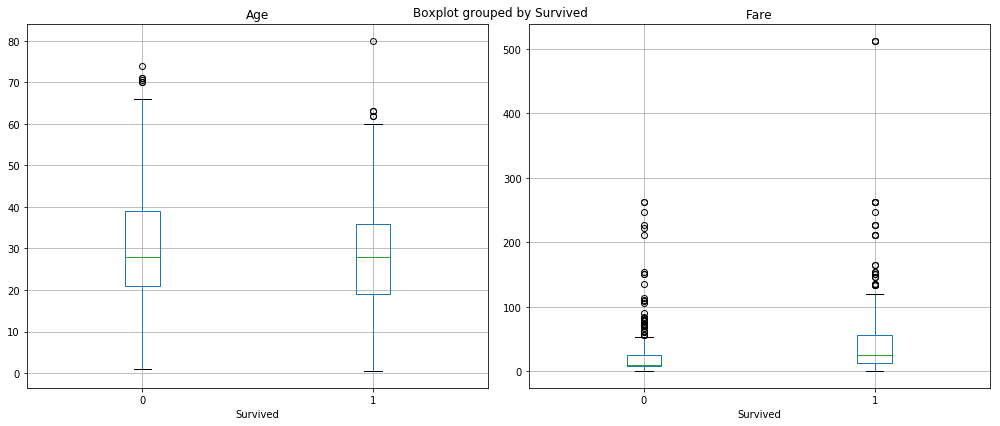

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data.boxplot(ax=axes[0], column='Age', by='Survived')
data.boxplot(ax=axes[1], column='Fare', by='Survived')
plt.tight_layout()
plt.show()

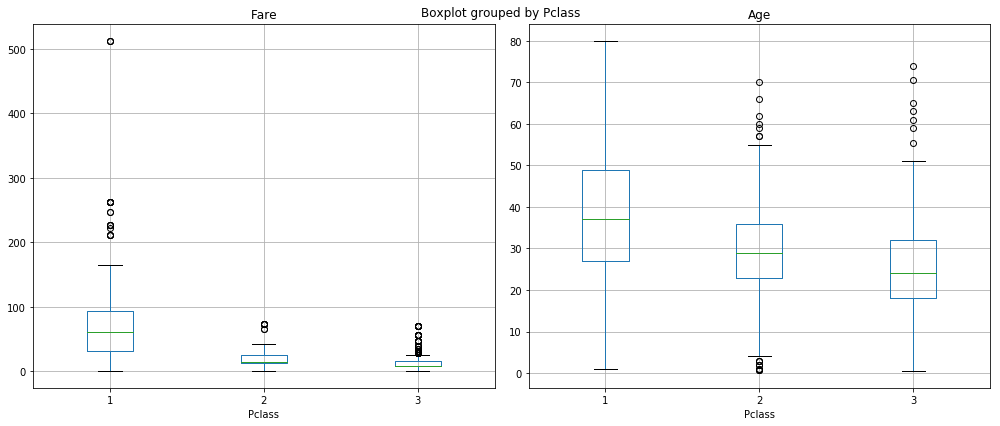

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data.boxplot(ax=axes[0], column='Fare', by='Pclass')
data.boxplot(ax=axes[1], column='Age', by='Pclass')
plt.tight_layout()
plt.show()

## Data preparation and model training

In [87]:
def fill_value_by_ml(row, target_col, feature_cols, model):
    features = row[feature_cols]
    if np.isnan(row[target_col]):
        return float(model.predict([features]))
    else:
        return row[target_col]

In [40]:
neighbor_features = data[np.logical_not(data['Age'].isnull())][['Age', 'Pclass', 'Fare', 'SibSp', 'Parch']]
age_labels = neighbor_features[['Age']]
neighbor_features = neighbor_features.iloc[:,1:]
print(age_labels.head())
print(neighbor_features.head())

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
   Pclass     Fare  SibSp  Parch
0       3   7.2500      1      0
1       1  71.2833      1      0
2       3   7.9250      0      0
3       1  53.1000      1      0
4       3   8.0500      0      0


In [45]:
data[data['Age'].isnull()].loc['Age']
print(data[data['Age'].isnull()])

     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121         

/Users/chanuwasaswamenakul/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
age_regressor = neighbors.KNeighborsRegressor(weights='distance')
age_regressor.fit(neighbor_features, age_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [84]:
test_age = data.apply(fill_missing_age, axis=1, model=age_regressor)

In [88]:
train_target = np.array(data['Survived'])

data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'male' else 1)

embark_map = {'C': 0, 'S': 1, 'Q': 2, 'Nan': 3}
data['Embarked'].fillna('Nan', inplace=True)
data['Embarked'] = data['Embarked'].apply(lambda x: embark_map[x])

data['Age'] = data.apply(fill_value_by_ml, axis=1, target_col='Age',
                         feature_cols=['Pclass', 'Fare', 'SibSp', 'Parch'], model=age_regressor)

In [90]:
fare_means = data.groupby(('Pclass'))['Fare'].mean()
print(fare_means)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [91]:
categ_features = data[['Sex', 'Embarked']]
print(categ_features.head(10))

   Sex  Embarked
0    0         1
1    1         0
2    1         1
3    1         1
4    0         1
5    0         2
6    0         1
7    0         1
8    1         1
9    1         0


In [92]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(categ_features)
ohe_categ_features = ohe.transform(categ_features).toarray()

In [95]:
print(ohe_categ_features)

[[1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]]


In [93]:
num_features = data[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]

In [94]:
train_data = np.column_stack((ohe_categ_features, num_features.values))

In [109]:
bounds = np.array([[-3, 2]])

n_params = bounds.shape[0]
n_restarts = 15

k_fold = 4

sample_vars = np.random.uniform(bounds[:,0], bounds[:,1], size=(n_restarts, n_params))
unit_nums = np.arange(2,8)

In [112]:
acc_scores = np.zeros((3, n_restarts))

# Tuning the first classifier for numeric features
print('Logit model')
for i in range(n_restarts):
    c = 10**sample_vars[i][0]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]

        # Classifiers 1: numerical features
        clf1 = linear_model.LogisticRegression(C=c, random_state=1)
        clf1.fit(train_num, y_train)
        
        y_pred = clf1.predict(val_num)
        acc_score = metrics.accuracy_score(y_val, y_pred)
        cross_scores.append(acc_score)
        
    acc_scores[0][i] = np.mean(cross_scores)
    print('[{}] C: {}, accuracy: {}'.format(i+1, c, acc_scores[0][i]))

# Tuning the second classifier for categorical features
print('Neural networks model')
for i in range(unit_nums.shape[0]):
    unit_num = unit_nums[i]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]
        
        # Classifier 2: categorical features
        clf2 = neural_network.MLPClassifier(hidden_layer_sizes=(unit_num,2), max_iter=1000, random_state=1)
        clf2.fit(train_categ, y_train)
        
        y_pred = clf2.predict(val_categ)
        acc_score = metrics.accuracy_score(y_val, y_pred)
        cross_scores.append(acc_score)
        
    acc_scores[1][i] = np.mean(cross_scores[1])
    print('[{}] unit_num: {}, accuracy: {}'.format(i+1, unit_num, acc_scores[1][i]))
    
# Extracting the optimal set of hyperparameters
best_c = 10**sample_vars[np.argmax(acc_scores[0])][0]
best_unit_num = unit_nums[np.argmax(acc_scores[1])]
    
# Tuning the stacked classifier
print('Stacked classifier')
for i in range(n_restarts):
    c = 10**sample_vars[i][0]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]
        
        clf1 = linear_model.LogisticRegression(C=best_c, random_state=1)
        clf2 = neural_network.MLPClassifier(hidden_layer_sizes=(best_unit_num,2))
        
        clf1.fit(train_num, y_train)
        clf2.fit(train_categ, y_train)
        
        # Stacked classifier trained using probabilities from previous classifiers
        prb1 = clf1.predict_proba(train_num)
        prb2 = clf2.predict_proba(train_categ)
        train_prob = np.column_stack((prb1, prb2))

        stack_clf = linear_model.LogisticRegression(C=c, random_state=1)
        stack_clf.fit(train_prob, y_train)

        # Validation test
        val_prb1 = clf1.predict_proba(val_num)
        val_prb2 = clf2.predict_proba(val_categ)
        val_prob = np.column_stack((val_prb1, val_prb2))
        y_pred = stack_clf.predict(val_prob)

        acc_score = metrics.accuracy_score(y_val, y_pred)
        #confusion_mat = metrics.confusion_matrix(y_val, y_pred)
        
        cross_scores.append(acc_score)
    acc_scores[2][i] = np.mean(cross_scores)
    print('[{}] C: {}, accuracy: {}'.format(i+1, c, acc_scores[2][i]))

Logit model
[1] C: 23.835812227567363, accuracy: 0.659217877094972
[2] C: 58.8678156528788, accuracy: 0.659217877094972
[3] C: 0.027309508060743753, accuracy: 0.659217877094972
[4] C: 0.03586598389809919, accuracy: 0.659217877094972
[5] C: 0.03689986281033986, accuracy: 0.664804469273743
[6] C: 8.846083946230046, accuracy: 0.659217877094972
[7] C: 0.0615257580085243, accuracy: 0.6536312849162011
[8] C: 65.89024998803797, accuracy: 0.659217877094972
[9] C: 0.13947694081883033, accuracy: 0.664804469273743
[10] C: 4.729695492405303, accuracy: 0.659217877094972
[11] C: 0.05911958156494384, accuracy: 0.6536312849162011
[12] C: 0.6470444167020922, accuracy: 0.659217877094972
[13] C: 6.022988520164214, accuracy: 0.659217877094972
[14] C: 55.67241789465446, accuracy: 0.659217877094972
[15] C: 0.008078814840815131, accuracy: 0.6536312849162011
Neural networks model
[1] unit_num: 2, accuracy: 0.5921787709497207
[2] unit_num: 3, accuracy: 0.5921787709497207
[3] unit_num: 4, accuracy: 0.7765363128

/Users/chanuwasaswamenakul/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1] C: 23.835812227567363, accuracy: 0.7458100558659218
[2] C: 58.8678156528788, accuracy: 0.7430167597765364
[3] C: 0.027309508060743753, accuracy: 0.6494413407821229
[4] C: 0.03586598389809919, accuracy: 0.7458100558659218
[5] C: 0.03689986281033986, accuracy: 0.6648044692737429
[6] C: 8.846083946230046, accuracy: 0.7653631284916201
[7] C: 0.0615257580085243, accuracy: 0.7402234636871508
[8] C: 65.89024998803797, accuracy: 0.6815642458100558
[9] C: 0.13947694081883033, accuracy: 0.7472067039106145
[10] C: 4.729695492405303, accuracy: 0.7835195530726258
[11] C: 0.05911958156494384, accuracy: 0.6620111731843575
[12] C: 0.6470444167020922, accuracy: 0.7108938547486033
[13] C: 6.022988520164214, accuracy: 0.7751396648044693
[14] C: 55.67241789465446, accuracy: 0.7793296089385474
[15] C: 0.008078814840815131, accuracy: 0.6075418994413408


# Test

In [14]:
test_df = pd.read_csv('Titanic/test.csv')

In [32]:
test_data = np.column_stack((test_p_class, test_age, test_sex, test_embark, test_sib, test_par, test_fare))
test_pred = model.predict(test_data)

In [35]:
output_df = pd.DataFrame(test_df['PassengerId'])
output_df['Survived'] = test_pred
output_df.to_csv('Titanic/titanic_submission.csv', index=False)